In [43]:
import numpy as np
import matplotlib.pyplot as plt
from os import walk

In [77]:
data_restgas =  np.genfromtxt("../data/massenspektrometer/proccesed/restgas.dat", skip_header=1, delimiter="\t")
masses = data_restgas[:,0]
ion_current = data_restgas[:,1]
print(masses)

[0.000e+00 3.000e-02 6.000e-02 ... 4.991e+01 4.994e+01 4.997e+01]


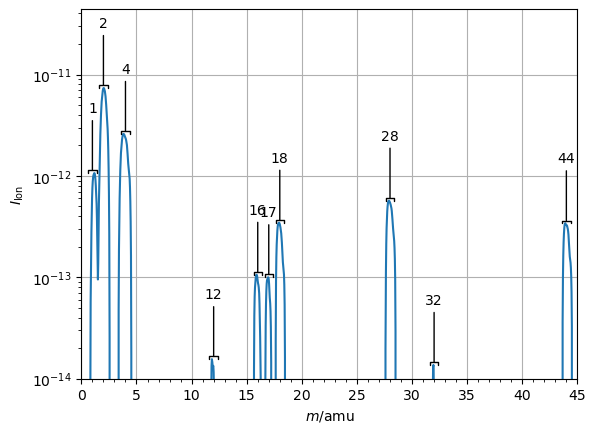

In [166]:
fig, ax = plt.subplots()
ax.plot(masses, ion_current)
ax.set(yscale="log", xlabel="$m / \\mathrm{amu}$", ylabel = "$I_\\mathrm{Ion}$")
ax.set_xticks(np.arange(1,50), minor=True)
ax.set_xticks(np.arange(0,50, 5))
#ax.set_xticks([1,2,4,12,16,17,18,28,32,44])
#ax.set_xticklabels([1,None,4,12,16,None,None,28,32,44])
def annotate(ax, m, ion_current, masses):
    closest_index = np.argmin(abs(masses-m))
    max = np.max(ion_current[closest_index-10:closest_index+10])
    ax.annotate(m,
                xy=(m, max), xycoords='data',
                xytext=(m, max * 4), textcoords='data',
                ha='center',
                arrowprops=dict(arrowstyle="-[,widthB=0.3",
                                connectionstyle="arc3")
                )

for m in  [1,2,4,12,16,17,18,28,32,44]:
     annotate(ax, m, ion_current, masses)
ax.grid()

ax.set(xlim=[0,45], ylim=[1e-14, max(ion_current)*6])

fig.savefig('../out/restgas.png')

In [170]:
def latex_float(f):
    float_str = "{0:.2g}".format(f)
    if "e" in float_str:
        base, exponent = float_str.split("e")
        return r"{0} \cdot 10^{{{1}}}".format(base, int(exponent))
    else:
        return float_str
def annotate_sub(ax, filename, values, data):
    for m in values:
        annotate(ax, m, data[filename][:,1], data[filename][:,0])

In [191]:
path = '../data/massenspektrometer/proccesed/gas/'

def plot_mass_spektro(path):
    filenames = next(walk(path))[2]
    data = {}
    for filename in filenames:
        data[filename] = np.loadtxt(path + filename, skiprows=1)

    fig2, ax2 = plt.subplots() #plt.subplots(3,1, sharex=True)
    ax2 = [ax2]
    ax2[0].set(yscale="log", ylabel = "$I_\\mathrm{Ion}$")
    for i, name in enumerate(sorted(np.asarray(list(data.keys()), dtype=float))):
        i=0
        ax2[i].plot(data[str(name)][:,0], data[str(name)][:,1], label = f"$P = {latex_float(name)} \\mathrm{{mBar}}$")

        #ax2.set_xticks([1,2,4,12,14,16,17,18,20,28,29,30,32,36, 38, 40, 44])
        ax2[i].set_xticks(np.arange(1,50), minor=True)
        ax2[i].set_xticks(np.arange(0,50, 5))
        ax2[i].grid()
        #ax2[i].text(1.02, 0.5, f'$P = {latex_float(name)}  \\mathrm{{mBar}}$',
        #               verticalalignment='center', horizontalalignment='left',
        #               transform=ax2[i].transAxes,
        #               rotation='vertical')
        ax2[i].set(xlim=[0,46], ylim=[min( data[str(name)][:,1]), max( data[str(name)][:,1])*6])

    ax2[-1].set(xlabel="$m / \\mathrm{amu}$")
    return fig2, ax2, data


C:\Users\hchr\AppData\Local\Temp\ipykernel_1448\2448071665.py:24: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax2[i].set(xlim=[0,46], ylim=[min( data[str(name)][:,1]), max( data[str(name)][:,1])*6])


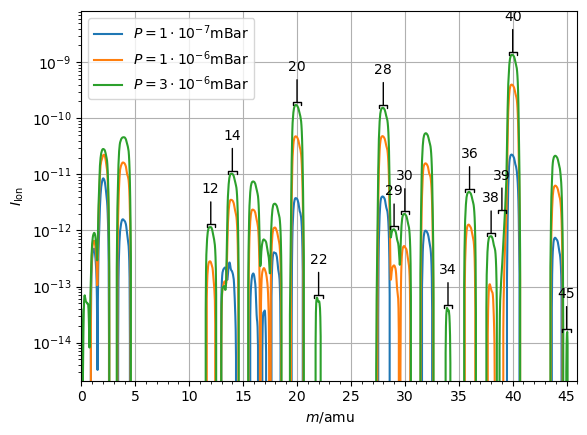

In [192]:
fig, ax, data = plot_mass_spektro('../data/massenspektrometer/proccesed/gas/')
annotate_sub(ax[0], "3e-06", [14, 20, 28, 40], data)
annotate_sub(ax[0], "3e-06", [12, 29, 30, 31, 36, 38, 39, 33], data)
annotate_sub(ax[0], "3e-06", [22, 34, 45], data)
ax[0].legend()
fig.savefig('../out/gas.png')

C:\Users\hchr\AppData\Local\Temp\ipykernel_1448\2448071665.py:24: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax2[i].set(xlim=[0,46], ylim=[min( data[str(name)][:,1]), max( data[str(name)][:,1])*6])


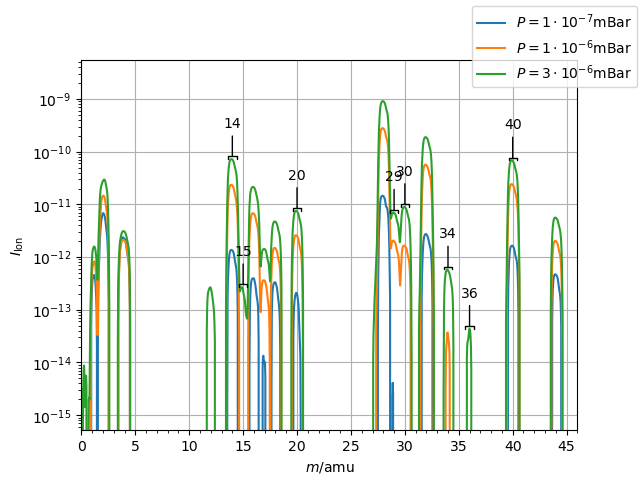

In [198]:

fig4, ax4, data = plot_mass_spektro('../data/massenspektrometer/proccesed/luft/')
annotate_sub(ax4[0], "3e-06", [14,20,29,40], data)
annotate_sub(ax4[0], "3e-06", [30, 34], data)
annotate_sub(ax4[0], "3e-06", [15,36], data)
fig4.legend()
fig4.savefig('../out/luft.png')